In [1]:
# importando las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sqlite3

In [18]:
def dataset():
    bd = sqlite3.connect("./salesdb/salesDB_grocery_market/restaurante.sqlite")
    dataB = bd.cursor()
    allData = dataB.execute('select categories.CategoryName, Products.ProductName, sales.Quantity, Products.Price,(sales.Quantity*Products.Price), sales.SalesDate from sales, Products, categories where sales.ProductID = Products.ProductID AND categories.CategoryID = Products.CategoryID LIMIT 100000')
    products = []
    for row in allData:
        products.append({
            'Category': row[0],
            'Product': row[1],
            'Quantity': row[2],
            'Price': row[3],
            'TotalPrice': row[4],
            'SalesDate': row[5]
        })
    data = pd.DataFrame(data=products)
    return data

In [19]:
def limpiandoDataset(data):

    # convirtiendo la columna de fecha en datetime
    data = data.sort_values("SalesDate")
    data = data[data["SalesDate"]!='NULL']
    data["SalesDate"] = pd.to_datetime(
        data["SalesDate"], format="%Y-%m-%d %H:%M:%S.%f")
    # creando columnas de fecha y hora
    data["fecha"] = data["SalesDate"].dt.date
    data["hora"] = data["SalesDate"].dt.hour
    data["dia"] = data["SalesDate"].dt.dayofweek
    data["semana"] = data["SalesDate"].dt.week

    return data

In [20]:
def agruparDatosSUM(data, campos, campo):
    data = data.groupby(campos).sum()
    #data = data.groupby([ data["hora"], data["ProductID"]]).sum()

    # se promedia el total de compras por cada hora del día en todos los días
    # del dataset
    if campo != "":
        data = data.reset_index(level=campo)
    else:
        data = data.reset_index()
    #data = data.groupby(data.hora).mean()
    return data

In [21]:
def agruparDatosMean(data, campos, campo):
    data = data.groupby(campos).mean()
    print('datos agrupados')
    #data = data.groupby([ data["hora"], data["ProductID"]]).sum()

    # se promedia el total de compras por cada hora del día en todos los días
    # del dataset
    if campo != "":
        data = data.reset_index(level=campo)
    else:
        data = data.reset_index()
    #data = data.groupby(data.hora).mean()
    
    return data


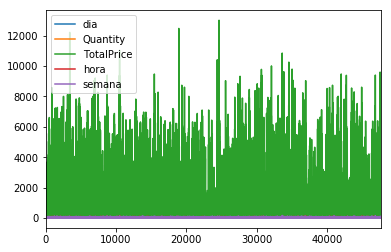

In [22]:
 #dataset 1 - productos vendidos en un dia
data1 = dataset()
data1 = limpiandoDataset(data1)
data1 = agruparDatosSUM(data1, ["Product", "dia", "fecha", "Price"],"")
#print(data1)
data1.plot()

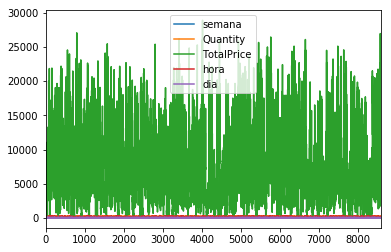

In [23]:
# dataset 2 - cantidad de un cierto producto vendido en cierta semana
data2 = dataset()
data2 = limpiandoDataset(data2)
data2 = agruparDatosSUM(data2, ["Product", "semana", "Price"],"")
#print(data2)
data2.plot()

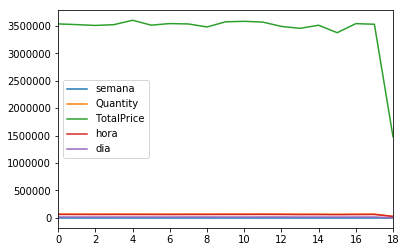

In [24]:
# dataset 3 - ganancias generadas en cierta semana
data3 = dataset()
data3 = limpiandoDataset(data3)
data3 = agruparDatosSUM(data3, ["semana"],"")
#print(data3)
data3.plot()

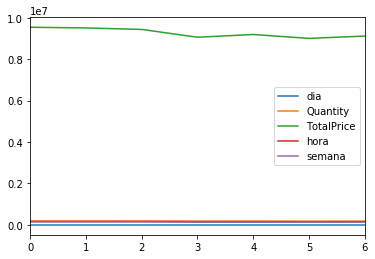

In [25]:
# dataset 4 - ganancias generadas en cierto dia de la semana
data4 = dataset()
data4 = limpiandoDataset(data4)
data4 = agruparDatosSUM(data4, ["dia"],"")
#print(data4)
data4.plot()

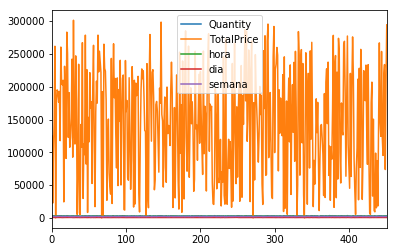

In [26]:
# dataset 5 - ganancias generada por los productos
data5 = dataset()
data5 = limpiandoDataset(data5)
data5 = agruparDatosSUM(data5, ["Product"],"")
#print(data5)
data5.plot()

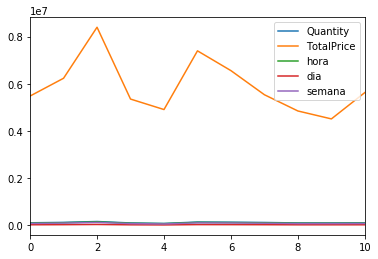

In [27]:
# dataset 6 - ganancias generada por los categorias
data6 = dataset()
data6 = limpiandoDataset(data6)
data6 = agruparDatosSUM(data6, ["Category"],"")
#print(data6)
data6.plot()